# Итоговое задание

Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы (вот она, сила ML!). Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам. 

Ниже вы найдете пошаговую инструкцию по выполнению проекта.

### Описание датасета
Посмотрим на переменные, которые содержит датасет:
1. *`school`* — аббревиатура школы, в которой учится ученик
2. *`sex`* — пол ученика ('F' - женский, 'M' - мужской)
3. *`age`* — возраст ученика (от 15 до 22)
4. *`address`* — тип адреса ученика ('U' - городской, 'R' - за городом)
5. *`famsize`* — размер семьи('LE3' <= 3, 'GT3' >3)
6. *`Pstatus`* — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. *`Medu`* — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. *`Fedu`* — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. *`Mjob`* — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. *`Fjob`* — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11. *`reason`* — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12. *`guardian`* — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13. *`traveltime`* — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. *`studytime`* — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15. *`failures`* — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
16. *`schoolsup`* — дополнительная образовательная поддержка (yes или no)
17. *`famsup`* — семейная образовательная поддержка (yes или no)
18. *`paid`* — дополнительные платные занятия по математике (yes или no)
19. *`activities`* — дополнительные внеучебные занятия (yes или no)
20. *`nursery`* — посещал детский сад (yes или no)
21. *`higher`* — хочет получить высшее образование (yes или no)
22. *`internet`* — наличие интернета дома (yes или no)
23. *`romantic`* — в романтических отношениях (yes или no)
24. *`famrel`* — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25. *`freetime`* — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26. *`goout`* — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27. *`health`* — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. *`absences`* — количество пропущенных занятий
29. *`score`* — баллы по госэкзамену по математике

### `Рекомендации по выполнению проекта`
1. Проведите ***первичную обработку*** данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
2. Посмотрите на ***распределение признака*** для числовых переменных, устраните выбросы.
3. Оцените количество ***уникальных значений*** для номинативных переменных.
4. По необходимости ***преобразуйте*** данные
5. Проведите ***корреляционный анализ*** количественных переменных
6. Отберите ***не коррелирующие*** переменные.
7. Проанализируйте номинативные переменные и устраните те, которые ***не влияют*** на предсказываемую величину (в нашем случае — на переменную score).
8. Не забудьте ***сформулировать выводы*** относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.
---

## Подготовка к работе
***Импорт библиотек и чтение файла***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

# буду использовать 2 датасета, чтобы сравнить, как будут разниться данные с заменой NaN и без замены
students = pd.read_csv('stud_math.csv')  # датасет с заменой данных
stud_original = pd.read_csv('stud_math.csv')  # датасет с минимальными изменениями

##### Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:

In [2]:
display(students.head(10))
students.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

1. Строковых - 17
2. Числовых - 13

***Здесь будут вспомогательные функции, которые будут использованы далее***

In [3]:
def display_info(df, column):
    '''вывод первичной информации о столбце. на входе - столбец датафрейма и название столбца'''
    display(pd.DataFrame(df[column].value_counts()))
    #print("Значений, встретившихся в столбце более 10 раз:", (x.value_counts()>10).sum())
    print("Уникальных значений:", df[column].nunique())
    df.loc[:, [column]].info()


def get_boxplot(df, column):
    '''построение графика'''
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

 
def get_stat_dif(column):
    '''тест Стьюдента'''
    cols = students.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'], 
                        students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
            

def stat_column(column):
    '''подведение статистики по верхним и нижним границам, вычисление квартилей'''
    mean_num = column.mean()
    perc25 = column.quantile(0.25)
    perc50 = column.quantile(0.50)
    perc75 = column.quantile(0.75)
    IQR = perc75 - perc25
    bottom_bound = perc25 - 1.5*IQR
    top_bound = perc75 + 1.5*IQR
#     count_lower = column[column < bottom_bound].value_counts()
#     count_upper = column[column > top_bound].value_counts()
    print(f'Среднее значение: {mean_num}\n',
        f'25-й перцентиль: {perc25}\n',
        f'50-й перцентиль: {perc50}\n',
        f'75-й перцентиль: {perc75}\n',
        f'IQR: {IQR}\n',
        f'Границы выбросов: [{bottom_bound}, {top_bound}]\n')
#          f'Количество выбросов ниже и выше границ: [{count_lower}, {count_upper}]')


# def refill_nan(df, column, refill_type):
#     '''Заполняет пропуски на медианой или модой'''
#     if refill_type == 'median':
#         refill = df[column].median()
#     if refill_type == 'mode':
#         refill = df[column].mode()[0]
    
#     if refill_type in ['median', 'mode']:
#         df[column].fillna(refill, inplace=True)

#     return df

def refill_nan(df, column):
    '''Заполняет пропуски на медианой или модой'''
    refill = None  # Переменная, будет в себе хранить медиану или моду
    
    if df[column].dtypes in ['int64', 'float64']:
        refill = df[column].median()
    if df[column].dtypes in ['object', 'O']:
        refill = df[column].mode()[0]
    
    if refill != 0:
        df[column].fillna(refill, inplace=True)

    return df

def start_refill(df):
    '''запуск замены пустых значений'''
    for col in df.columns:
        refill_nan(df, col)

# Устал прописывать одно и то же по 10 раз, написал коротенькую функцию
def show_info(df, column):
    '''Показывает первичную информацию по колонке'''
    print(f'========================================\nВывод значений:')
    display(df[column].value_counts(dropna = False))
    print(f'========================================\nВывод процентного соотношения:')
    display(df[column].value_counts(dropna = False, normalize = True))
    print(f'========================================\nВывод общей информации:')
    display_info(df, column)
    if df[column].dtypes in ['int64', 'float64']:  # Если значения числовые
        print(f'\n========================================\nПервичная статистика (квартили, границы):')
        stat_column(df[column])
    print(f'\n========================================\nГрафик:')
    df[column].hist()

## Рассмотрим столбцы

Заранее определим на будущее ряд правил:
1. Заменяем пустые значения на:
    * Моду, если тип строковый
    * Медиану, если тип числовой
    * Пустые в оригинальном файле, чтобы не исключить возможное влияние на статистику
2. При наличии выбросов не забываем пользоваться логикой.
    * в оригинальном файле совсем странные значения будем менять на пустые. Если значения похожи на другие, то заменяем на похожие
    * в файле с заменой данных будем менять не на пустые, а медиану
3. Чтобы не путаться в названиях из-за регистров, приведем все названия колонок к нижнему регистру

In [4]:
students.columns = students.columns.map(lambda x: x.lower())
stud_original.columns = stud_original.columns.map(lambda x: x.lower())

Как мы уже видели, почти во всех столбцах есть пустые значения. Больше всего их в столбце pstatus

In [6]:
students.pstatus.value_counts(dropna = False, normalize = True)

T      0.794937
NaN    0.113924
A      0.091139
Name: pstatus, dtype: float64

Таким образом мы понимаем, что самый большой процент пустых значений по столбцам - 11,7%
Попробуем заменить на моду/медиану все пропуски и проанализировать. В конце сравним с оригиналом

In [7]:
start_refill(students)

students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              395 non-null    object 
 4   famsize              395 non-null    object 
 5   pstatus              395 non-null    object 
 6   medu                 395 non-null    float64
 7   fedu                 395 non-null    float64
 8   mjob                 395 non-null    object 
 9   fjob                 395 non-null    object 
 10  reason               395 non-null    object 
 11  guardian             395 non-null    object 
 12  traveltime           395 non-null    float64
 13  studytime            395 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            395 non-null    obj

#### SCHOOL

Вывод значений:


GP    349
MS     46
Name: school, dtype: int64

Вывод процентного соотношения:


GP    0.883544
MS    0.116456
Name: school, dtype: float64

Вывод общей информации:


,school
GP,349
MS,46


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB

График:


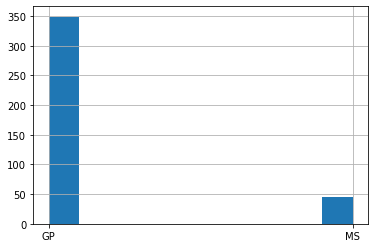

In [8]:
show_info(students, 'school')

1. *Не имеет пропусков*
2. *Большинство учеников (88%) из школы GP*
3. *Чисто информативная колонка, отфильтровать не получится*

#### SEX

Вывод значений:


F    208
M    187
Name: sex, dtype: int64

Вывод процентного соотношения:


F    0.526582
M    0.473418
Name: sex, dtype: float64

Вывод общей информации:


,sex
F,208
M,187


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB

График:


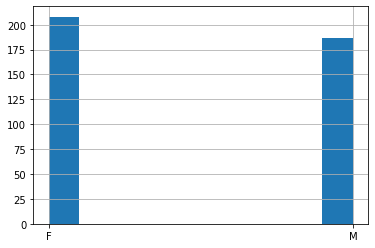

In [9]:
show_info(students, 'sex')

1. *Не имеет пропусков*
2. *Мужчин чуть менее половины (47%)*
3. *Не фильтруем*

#### AGE

Вывод значений:


16    104
17     98
15     82
18     82
19     24
20      3
21      1
22      1
Name: age, dtype: int64

Вывод процентного соотношения:


16    0.263291
17    0.248101
15    0.207595
18    0.207595
19    0.060759
20    0.007595
21    0.002532
22    0.002532
Name: age, dtype: float64

Вывод общей информации:


,age
16,104
17,98
15,82
18,82
19,24
20,3
21,1
22,1


Уникальных значений: 8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB

Первичная статистика (квартили, границы):
Среднее значение: 16.696202531645568
 25-й перцентиль: 16.0
 50-й перцентиль: 17.0
 75-й перцентиль: 18.0
 IQR: 2.0
 Границы выбросов: [13.0, 21.0]


График:


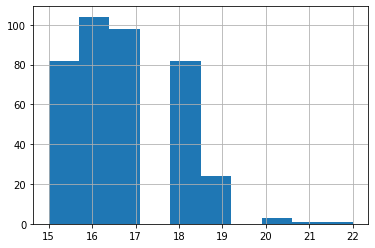

In [10]:
show_info(students, 'age')

*По результатам видно, что есть выброс. Выброс один, на общую статистику влияния не окажет, но для полноты картины оставим*

#### ADDRESS

Вывод значений:


U    312
R     83
Name: address, dtype: int64

Вывод процентного соотношения:


U    0.789873
R    0.210127
Name: address, dtype: float64

Вывод общей информации:


,address
U,312
R,83


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB

График:


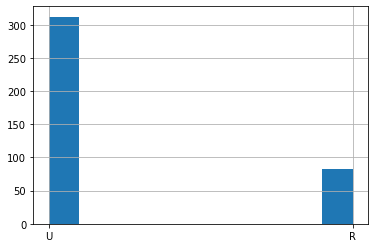

In [11]:
show_info(students, 'address')

*Не удивительно, что большинство учащихся живут в городе*

#### FAMSIZE

Вывод значений:


GT3    288
LE3    107
Name: famsize, dtype: int64

Вывод процентного соотношения:


GT3    0.729114
LE3    0.270886
Name: famsize, dtype: float64

Вывод общей информации:


,famsize
GT3,288
LE3,107


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB

График:


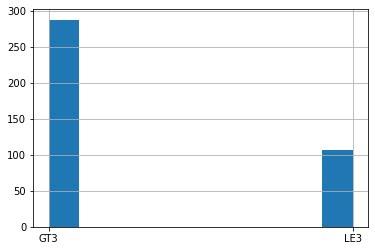

In [12]:
show_info(students, 'famsize')

*Большинство семей состоит из 4-ех человек и более*

#### PSTATUS

Вывод значений:


T    359
A     36
Name: pstatus, dtype: int64

Вывод процентного соотношения:


T    0.908861
A    0.091139
Name: pstatus, dtype: float64

Вывод общей информации:


,pstatus
T,359
A,36


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pstatus  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB

График:


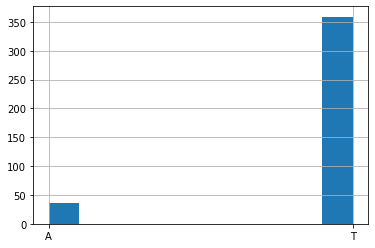

In [13]:
show_info(students, 'pstatus')

*Преобладает значение T*

#### MEDU

Вывод значений:


4.0    131
2.0    102
3.0    100
1.0     59
0.0      3
Name: medu, dtype: int64

Вывод процентного соотношения:


4.0    0.331646
2.0    0.258228
3.0    0.253165
1.0    0.149367
0.0    0.007595
Name: medu, dtype: float64

Вывод общей информации:


,medu
4.0,131
2.0,102
3.0,100
1.0,59
0.0,3


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   medu    395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB

Первичная статистика (квартили, границы):
Среднее значение: 2.751898734177215
 25-й перцентиль: 2.0
 50-й перцентиль: 3.0
 75-й перцентиль: 4.0
 IQR: 2.0
 Границы выбросов: [-1.0, 7.0]


График:


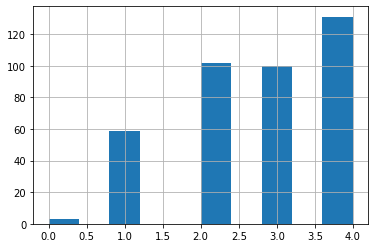

In [14]:
show_info(students, 'medu')

1. *Выбросов нет*
2. *Большинство значений - 4. Значит матерей с высшим образованием больше всех. Интересно, влияет ли этот параметр на успеваемость ребенка? (Проверим позже)*

#### FEDU

Вывод значений:


2.0     130
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: fedu, dtype: int64

Вывод процентного соотношения:


2.0     0.329114
3.0     0.243038
4.0     0.222785
1.0     0.197468
0.0     0.005063
40.0    0.002532
Name: fedu, dtype: float64

Вывод общей информации:


,fedu
2.0,130
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fedu    395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB

Первичная статистика (квартили, границы):
Среднее значение: 2.5772151898734177
 25-й перцентиль: 2.0
 50-й перцентиль: 2.0
 75-й перцентиль: 3.0
 IQR: 1.0
 Границы выбросов: [0.5, 4.5]


График:


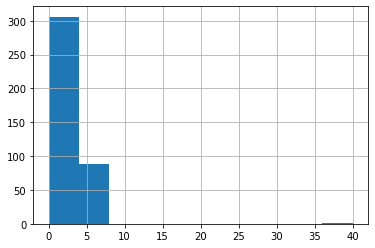

In [15]:
show_info(students, 'fedu')

1. Имеет выбросы.
    * По условию значения должны быть от 0 до 4, но есть одно значение 40. Скорее всего здесь ошибка, имелось ввиду значение 4.
    * Есть значение 0. Но по условию данное значение допустимо, сперва заменим выброс 40, потом перепроверим данные. 
2. Здесь мы наблюдаем иную картину. Большинство отцов имеют образование в 5-9 классов. Посмотрим потом, как это будет влиять на успеваемость ребенка

Вывод значений:


2.0    130
3.0     96
4.0     89
1.0     78
0.0      2
Name: fedu, dtype: int64

Вывод процентного соотношения:


2.0    0.329114
3.0    0.243038
4.0    0.225316
1.0    0.197468
0.0    0.005063
Name: fedu, dtype: float64

Вывод общей информации:


,fedu
2.0,130
3.0,96
4.0,89
1.0,78
0.0,2


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fedu    395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB

Первичная статистика (квартили, границы):
Среднее значение: 2.4860759493670885
 25-й перцентиль: 2.0
 50-й перцентиль: 2.0
 75-й перцентиль: 3.0
 IQR: 1.0
 Границы выбросов: [0.5, 4.5]


График:


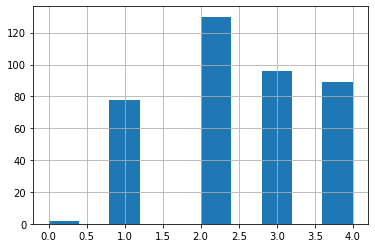

In [16]:
students.fedu = students.fedu.apply(lambda x: 4 if x == 40 else x)
stud_original.fedu = stud_original.fedu.apply(lambda x: 4 if x == 40 else x)

# А теперь проверим, как данные поменялись
show_info(students, 'fedu')

*По прежнему значения 0 - выбросы. Их 2. Хоть 2 значения и не внесут большого влияния на статистику, но мы их оставим, т.к. данные значения допустимы по условию*

#### MJOB

Вывод значений:


other       152
services     98
at_home      58
teacher      55
health       32
Name: mjob, dtype: int64

Вывод процентного соотношения:


other       0.384810
services    0.248101
at_home     0.146835
teacher     0.139241
health      0.081013
Name: mjob, dtype: float64

Вывод общей информации:


,mjob
other,152
services,98
at_home,58
teacher,55
health,32


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mjob    395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB

График:


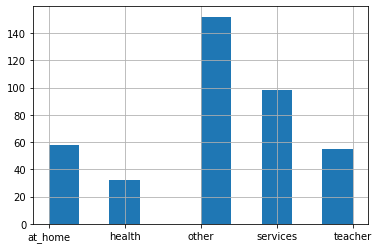

In [17]:
show_info(students, 'mjob')

*Преобладает значение Other*

#### FJOB

Вывод значений:


other       233
services    102
teacher      29
at_home      16
health       15
Name: fjob, dtype: int64

Вывод процентного соотношения:


other       0.589873
services    0.258228
teacher     0.073418
at_home     0.040506
health      0.037975
Name: fjob, dtype: float64

Вывод общей информации:


,fjob
other,233
services,102
teacher,29
at_home,16
health,15


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fjob    395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB

График:


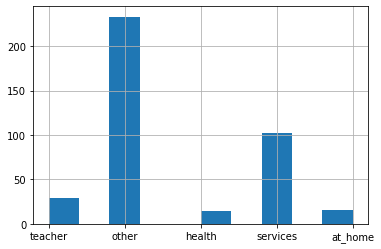

In [18]:
show_info(students, 'fjob')

*Аналогично предыдущей колонке - преобладает Other*

#### REASON

Вывод значений:


course        154
home          104
reputation    103
other          34
Name: reason, dtype: int64

Вывод процентного соотношения:


course        0.389873
home          0.263291
reputation    0.260759
other         0.086076
Name: reason, dtype: float64

Вывод общей информации:


,reason
course,154
home,104
reputation,103
other,34


Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB

График:


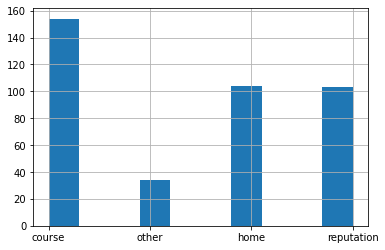

In [19]:
show_info(students, 'reason')

*Преобладает значение course*

#### GUARDIAN

Вывод значений:


mother    281
father     86
other      28
Name: guardian, dtype: int64

Вывод процентного соотношения:


mother    0.711392
father    0.217722
other     0.070886
Name: guardian, dtype: float64

Вывод общей информации:


,guardian
mother,281
father,86
other,28


Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB

График:


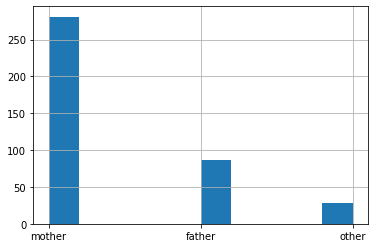

In [20]:
show_info(students, 'guardian')

*Преобладает значение mother*

#### TRAVELTIME

Вывод значений:


1.0    270
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

Вывод процентного соотношения:


1.0    0.683544
2.0    0.243038
3.0    0.055696
4.0    0.017722
Name: traveltime, dtype: float64

Вывод общей информации:


,traveltime
1.0,270
2.0,96
3.0,22
4.0,7


Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB

Первичная статистика (квартили, границы):
Среднее значение: 1.4075949367088607
 25-й перцентиль: 1.0
 50-й перцентиль: 1.0
 75-й перцентиль: 2.0
 IQR: 1.0
 Границы выбросов: [-0.5, 3.5]


График:


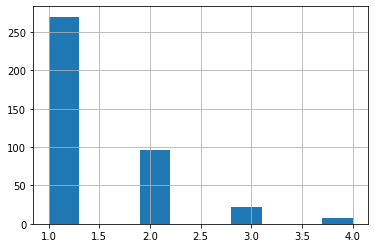

In [21]:
show_info(students, 'traveltime')

1. *Сильно преобладает значение 1*
2. *Есть выбросы, их 7. Но данные значения могут быть по условию и для статистики могут быть интересны. Предпочту их оставить*

#### STUDYTIME

Вывод значений:


2.0    201
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

Вывод процентного соотношения:


2.0    0.508861
1.0    0.260759
3.0    0.162025
4.0    0.068354
Name: studytime, dtype: float64

Вывод общей информации:


,studytime
2.0,201
1.0,103
3.0,64
4.0,27


Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB

Первичная статистика (квартили, границы):
Среднее значение: 2.037974683544304
 25-й перцентиль: 1.0
 50-й перцентиль: 2.0
 75-й перцентиль: 2.0
 IQR: 1.0
 Границы выбросов: [-0.5, 3.5]


График:


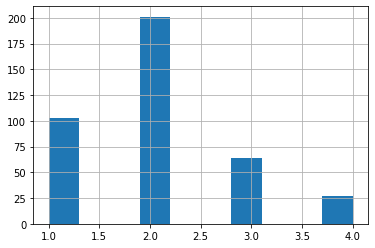

In [22]:
show_info(students, 'studytime')

1. *Преобладает значение 2*
2. *Есть выбросы, их много. Могут повлиять на статистику, оставим*

#### FAILURES

Вывод значений:


0.0    315
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

Вывод процентного соотношения:


0.0    0.797468
1.0    0.124051
2.0    0.040506
3.0    0.037975
Name: failures, dtype: float64

Вывод общей информации:


,failures
0.0,315
1.0,49
2.0,16
3.0,15


Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB

Первичная статистика (квартили, границы):
Среднее значение: 0.3189873417721519
 25-й перцентиль: 0.0
 50-й перцентиль: 0.0
 75-й перцентиль: 0.0
 IQR: 0.0
 Границы выбросов: [0.0, 0.0]


График:


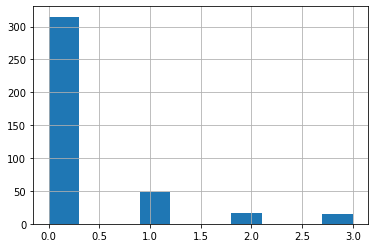

In [23]:
# почему-то функция замены пустых не отработала на данной колонке. Заменим сами
students.failures.fillna(0, inplace = True)

show_info(students, 'failures')

1. *Распределение напоминает параболу*
2. *преобладает 0*

#### SCHOOLSUP

Вывод значений:


no     344
yes     51
Name: schoolsup, dtype: int64

Вывод процентного соотношения:


no     0.870886
yes    0.129114
Name: schoolsup, dtype: float64

Вывод общей информации:


,schoolsup
no,344
yes,51


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB

График:


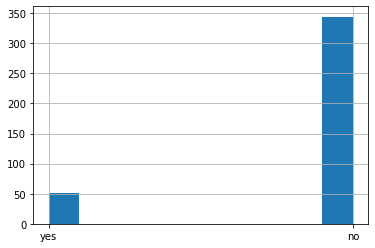

In [24]:
# students = refill_nan(students, 'schoolsup')

show_info(students, 'schoolsup')

*Преобладает NO*


#### FAMSUP

Вывод значений:


yes    258
no     137
Name: famsup, dtype: int64

Вывод процентного соотношения:


yes    0.653165
no     0.346835
Name: famsup, dtype: float64

Вывод общей информации:


,famsup
yes,258
no,137


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB

График:


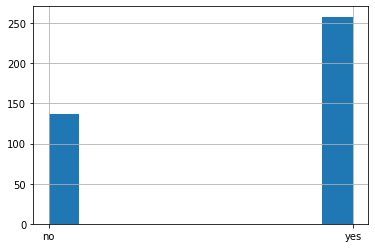

In [25]:
# students = refill_nan(students, 'famsup')

show_info(students, 'famsup')

*Преобладает значение yes*

#### PAID

Вывод значений:


no     240
yes    155
Name: paid, dtype: int64

Вывод процентного соотношения:


no     0.607595
yes    0.392405
Name: paid, dtype: float64

Вывод общей информации:


,paid
no,240
yes,155


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB

График:


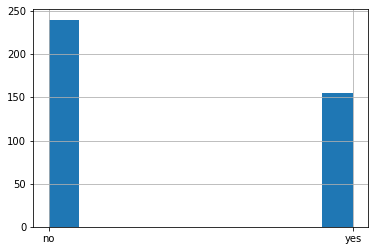

In [26]:
# students = refill_nan(students, 'studytime')

show_info(students, 'paid')

*Преобладает no, но не сильно*

#### ACTIVITIES

Вывод значений:


yes    209
no     186
Name: activities, dtype: int64

Вывод процентного соотношения:


yes    0.529114
no     0.470886
Name: activities, dtype: float64

Вывод общей информации:


,activities
yes,209
no,186


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB

График:


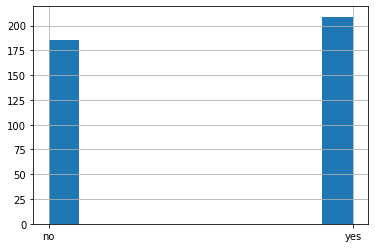

In [27]:
# students = refill_nan(students, 'activities')

show_info(students, 'activities')

*Преобладает yes, разница не велика*

#### NURSERY

Вывод значений:


yes    316
no      79
Name: nursery, dtype: int64

Вывод процентного соотношения:


yes    0.8
no     0.2
Name: nursery, dtype: float64

Вывод общей информации:


,nursery
yes,316
no,79


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB

График:


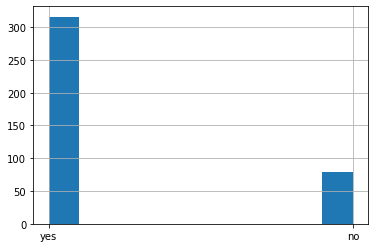

In [28]:
# students = refill_nan(students, 'nursery')

show_info(students, 'nursery')

*Преобладает yes*

#### HIGHER

Вывод значений:


yes    376
no      19
Name: higher, dtype: int64

Вывод процентного соотношения:


yes    0.951899
no     0.048101
Name: higher, dtype: float64

Вывод общей информации:


,higher
yes,376
no,19


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB

График:


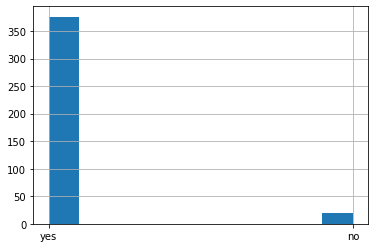

In [29]:
# students = refill_nan(students, 'higher')

show_info(students, 'higher')

*Преобладает YES*

#### INTERNET

Вывод значений:


yes    339
no      56
Name: internet, dtype: int64

Вывод процентного соотношения:


yes    0.858228
no     0.141772
Name: internet, dtype: float64

Вывод общей информации:


,internet
yes,339
no,56


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB

График:


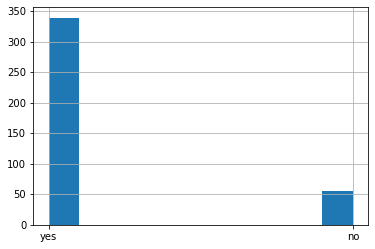

In [30]:
# students = refill_nan(students, 'internet')

show_info(students, 'internet')

*Преобладает YES*

#### ROMANTIC

Вывод значений:


no     271
yes    124
Name: romantic, dtype: int64

Вывод процентного соотношения:


no     0.686076
yes    0.313924
Name: romantic, dtype: float64

Вывод общей информации:


,romantic
no,271
yes,124


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB

График:


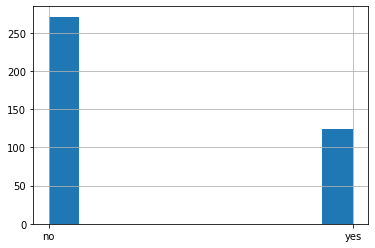

In [31]:
# students = refill_nan(students, 'romantic')

show_info(students, 'romantic')

*Преобладает YES*

#### FAMREL

Вывод значений:


 4.0    209
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

Вывод процентного соотношения:


 4.0    0.529114
 5.0    0.250633
 3.0    0.156962
 2.0    0.043038
 1.0    0.017722
-1.0    0.002532
Name: famrel, dtype: float64

Вывод общей информации:


,famrel
4.0,209
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB

Первичная статистика (квартили, границы):
Среднее значение: 3.9417721518987343
 25-й перцентиль: 4.0
 50-й перцентиль: 4.0
 75-й перцентиль: 4.5
 IQR: 0.5
 Границы выбросов: [3.25, 5.25]


График:


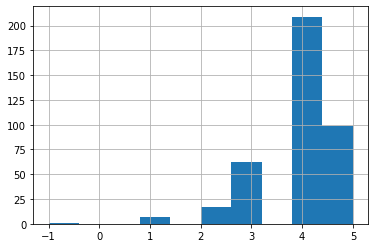

In [32]:
# students = refill_nan(students, 'famsup')

show_info(students, 'famrel')

1. *Преобладает 4*
2. *Есть выбросы, но подходят под условие. Посмотрим, что нам покажет анализ. Оставим*
3. *Здравый смысл подсказывает, что значение -1 - явная ошибка. Похоже что должно быть 1, заменим*
4. Распределене напоминает гиперболу (по модулю с наибольшим значением в точке 4)

Вывод значений:


4.0    191
5.0     90
3.0     56
2.0     14
1.0      7
Name: famrel, dtype: int64

Вывод процентного соотношения:


4.0    0.533520
5.0    0.251397
3.0    0.156425
2.0    0.039106
1.0    0.019553
Name: famrel, dtype: float64

Вывод общей информации:


,famrel
4.0,191
5.0,90
3.0,56
2.0,14
1.0,7


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  358 non-null    float64
dtypes: float64(1)
memory usage: 5.6 KB

Первичная статистика (квартили, границы):
Среднее значение: 3.958100558659218
 25-й перцентиль: 4.0
 50-й перцентиль: 4.0
 75-й перцентиль: 4.75
 IQR: 0.75
 Границы выбросов: [2.875, 5.875]


График:


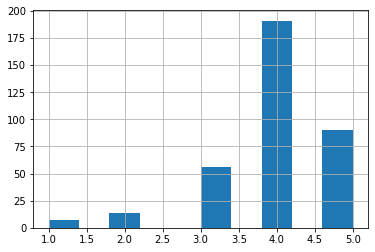

In [44]:
students.famrel = students.famrel.apply(lambda x: 1 if x == -1 else x)
stud_original.famrel = stud_original.famrel.apply(lambda x: 1 if x == -1 else x)
# students = refill_nan(students, 'famrel')

show_info(students, 'famrel')

In [34]:
students.famrel.describe()

count    395.000000
mean       3.946835
std        0.872425
min        1.000000
25%        4.000000
50%        4.000000
75%        4.500000
max        5.000000
Name: famrel, dtype: float64

*Интересно получается, что теперь по границам выбросов у нас возможно одно единственное число - 4, остальное выбросы. Явно менять/удалять данные не надо. Проанализируем потом*

#### FREETIME

Вывод значений:


3.0    164
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

Вывод процентного соотношения:


3.0    0.415190
4.0    0.283544
2.0    0.159494
5.0    0.096203
1.0    0.045570
Name: freetime, dtype: float64

Вывод общей информации:


,freetime
3.0,164
4.0,112
2.0,63
5.0,38
1.0,18


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB

Первичная статистика (квартили, границы):
Среднее значение: 3.2253164556962024
 25-й перцентиль: 3.0
 50-й перцентиль: 3.0
 75-й перцентиль: 4.0
 IQR: 1.0
 Границы выбросов: [1.5, 5.5]


График:


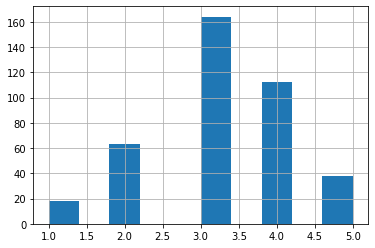

In [35]:
# students = refill_nan(students, 'freetime')

show_info(students, 'freetime')

1. *Преобладает 3*
2. *Есть выбросы. Но они могут показатсья статистически интересными, оставим*

#### GOOUT

Вывод значений:


3.0    135
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

Вывод процентного соотношения:


3.0    0.341772
2.0    0.255696
4.0    0.212658
5.0    0.131646
1.0    0.058228
Name: goout, dtype: float64

Вывод общей информации:


,goout
3.0,135
2.0,101
4.0,84
5.0,52
1.0,23


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB

Первичная статистика (квартили, границы):
Среднее значение: 3.1037974683544305
 25-й перцентиль: 2.0
 50-й перцентиль: 3.0
 75-й перцентиль: 4.0
 IQR: 2.0
 Границы выбросов: [-1.0, 7.0]


График:


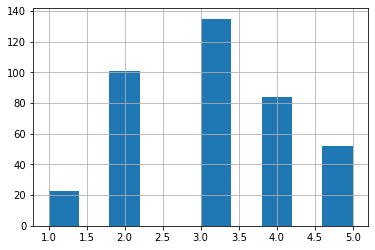

In [36]:
# students = refill_nan(students, 'goout')

show_info(students, 'goout')

1. *преобладает 3*
2. *выбросов нет*

#### HEALTH

Вывод значений:


5.0    138
3.0     89
4.0     78
1.0     47
2.0     43
Name: health, dtype: int64

Вывод процентного соотношения:


5.0    0.349367
3.0    0.225316
4.0    0.197468
1.0    0.118987
2.0    0.108861
Name: health, dtype: float64

Вывод общей информации:


,health
5.0,138
3.0,89
4.0,78
1.0,47
2.0,43


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB

Первичная статистика (квартили, границы):
Среднее значение: 3.5493670886075948
 25-й перцентиль: 3.0
 50-й перцентиль: 4.0
 75-й перцентиль: 5.0
 IQR: 2.0
 Границы выбросов: [0.0, 8.0]


График:


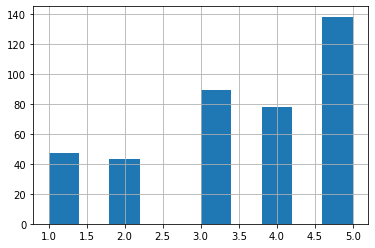

In [37]:
# students = refill_nan(students, 'health')

show_info(students, 'health')

1. *преобладает 5*
2. *выбросов нет*

#### ABSENSES

Вывод значений:


0.0      111
4.0       65
2.0       60
6.0       31
8.0       21
10.0      17
14.0      12
12.0      12
3.0        8
16.0       7
7.0        6
18.0       5
5.0        5
20.0       4
9.0        3
22.0       3
1.0        3
13.0       2
15.0       2
11.0       2
40.0       1
38.0       1
56.0       1
23.0       1
24.0       1
25.0       1
385.0      1
17.0       1
75.0       1
21.0       1
212.0      1
28.0       1
19.0       1
26.0       1
30.0       1
54.0       1
Name: absences, dtype: int64

Вывод процентного соотношения:


0.0      0.281013
4.0      0.164557
2.0      0.151899
6.0      0.078481
8.0      0.053165
10.0     0.043038
14.0     0.030380
12.0     0.030380
3.0      0.020253
16.0     0.017722
7.0      0.015190
18.0     0.012658
5.0      0.012658
20.0     0.010127
9.0      0.007595
22.0     0.007595
1.0      0.007595
13.0     0.005063
15.0     0.005063
11.0     0.005063
40.0     0.002532
38.0     0.002532
56.0     0.002532
23.0     0.002532
24.0     0.002532
25.0     0.002532
385.0    0.002532
17.0     0.002532
75.0     0.002532
21.0     0.002532
212.0    0.002532
28.0     0.002532
19.0     0.002532
26.0     0.002532
30.0     0.002532
54.0     0.002532
Name: absences, dtype: float64

Вывод общей информации:


,absences
0.0,111
4.0,65
2.0,60
6.0,31
8.0,21
10.0,17
14.0,12
12.0,12
3.0,8
16.0,7


Уникальных значений: 36
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB

Первичная статистика (квартили, границы):
Среднее значение: 7.179746835443038
 25-й перцентиль: 0.0
 50-й перцентиль: 4.0
 75-й перцентиль: 8.0
 IQR: 8.0
 Границы выбросов: [-12.0, 20.0]


График:


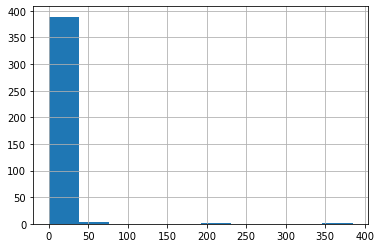

In [38]:
# students = refill_nan(students, 'absences')

show_info(students, 'absences')

*Есть 2 строки, содержащие явные ошибки - значения 385 и 212. сперва отредактируем эти строки
Узнаем, сколько строк - выбросы*

In [45]:
students.absences = students.absences.apply(lambda x: 0 if x > 100 else x)
stud_original.absences = stud_original.absences.apply(lambda x: None if x > 100 else x)

students[students.absences > 20].absences.count()

15

*оставим, т.к. значения похожи на допустимые. Что с ними делать, пока не ясно*

#### SCORE
А вот и наша главная колонка. Именно она нам для статистики и интересна.

Вывод значений:


50.0     54
55.0     52
0.0      37
75.0     33
65.0     31
60.0     31
40.0     31
45.0     27
70.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
20.0      1
100.0     1
Name: score, dtype: int64

Вывод процентного соотношения:


50.0     0.136709
55.0     0.131646
0.0      0.093671
75.0     0.083544
65.0     0.078481
60.0     0.078481
40.0     0.078481
45.0     0.068354
70.0     0.068354
80.0     0.040506
30.0     0.037975
90.0     0.030380
35.0     0.022785
25.0     0.017722
85.0     0.015190
95.0     0.012658
20.0     0.002532
100.0    0.002532
Name: score, dtype: float64

Вывод общей информации:


,score
50.0,54
55.0,52
0.0,37
75.0,33
65.0,31
60.0,31
40.0,31
45.0,27
70.0,27
80.0,16


Уникальных значений: 18
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB

Первичная статистика (квартили, границы):
Среднее значение: 52.30379746835443
 25-й перцентиль: 40.0
 50-й перцентиль: 55.0
 75-й перцентиль: 70.0
 IQR: 30.0
 Границы выбросов: [-5.0, 115.0]


График:


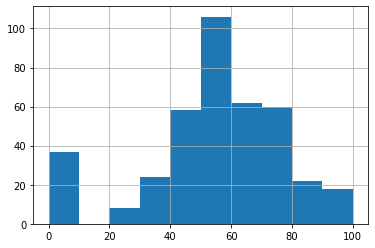

In [40]:
# students = refill_nan(students, 'famsup')

show_info(students, 'score')

1. *самое частое - 50*
2. *есть нулевые значения. Нужно быть сверхразумом, чтобы заработать 0 баллов. Из графика видно, что эти данные выбиваются из обей картины, уберем*
3. *пустые значения нам точно не нужны, так как они не дают нам никаких результатов исследования. От них избавимся. Не забудем избавиться от этих строк и во втором датасете*

In [43]:
students = students[students.score > 0]
stud_original = stud_original[stud_original.score > 0]

Вывод значений:


50.0     54
55.0     52
75.0     33
60.0     31
65.0     31
40.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

Вывод процентного соотношения:


50.0     0.150838
55.0     0.145251
75.0     0.092179
60.0     0.086592
65.0     0.086592
40.0     0.086592
70.0     0.075419
45.0     0.075419
80.0     0.044693
30.0     0.041899
90.0     0.033520
35.0     0.025140
25.0     0.019553
85.0     0.016760
95.0     0.013966
100.0    0.002793
20.0     0.002793
Name: score, dtype: float64

Вывод общей информации:


,score
50.0,54
55.0,52
75.0,33
60.0,31
65.0,31
40.0,31
70.0,27
45.0,27
80.0,16
30.0,15


Уникальных значений: 17
<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   358 non-null    float64
dtypes: float64(1)
memory usage: 5.6 KB

Первичная статистика (квартили, границы):
Среднее значение: 57.70949720670391
 25-й перцентиль: 46.25
 50-й перцентиль: 55.0
 75-й перцентиль: 70.0
 IQR: 23.75
 Границы выбросов: [10.625, 105.625]


График:


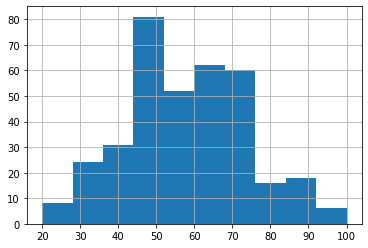

In [42]:
show_info(students, 'score')

---

# Корреляционный анализ

Так как я захотел рассмотреть 2 датасета (с упстыми значениями и замененными), то проведу 2 анализа и сравню результаты

### Анализ оригинального датасета